Repo card metadata block was not found. Setting CardData to empty.


DatasetDict({
    train: Dataset({
        features: ['task_type', 'dataset', 'input', 'output', 'situation', 'label', 'extra', 'instruction'],
        num_rows: 7446
    })
    validation: Dataset({
        features: ['task_type', 'dataset', 'input', 'output', 'situation', 'label', 'extra', 'instruction'],
        num_rows: 900
    })
    test: Dataset({
        features: ['task_type', 'dataset', 'input', 'output', 'situation', 'label', 'extra', 'instruction'],
        num_rows: 900
    })
})
=== Aspect Count Distribution ===
aspect_count
2     5020
3     1778
4      445
5      133
6       48
7       13
8        6
9        1
10       1
11       1
Name: count, dtype: int64


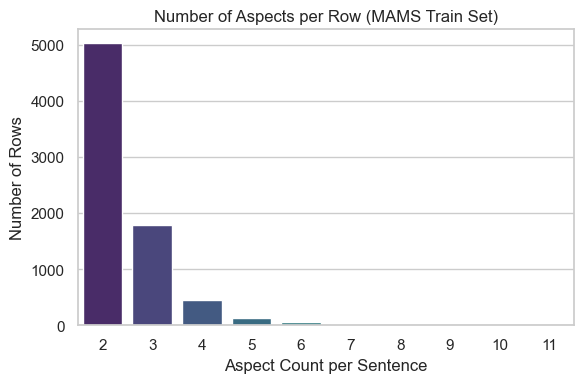

In [3]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

sns.set(style="whitegrid")

# -----------------------------------------
# 1. Load dataset
# -----------------------------------------
ds = load_dataset("NEUDM/mams")
print(ds)
train = ds["train"].to_pandas()

# -----------------------------------------
# 2. Extract aspect list from output column
#    output = "[['food','positive'], ['service','negative']]"
# -----------------------------------------

def extract_aspects(output_str):
    try:
        parsed = ast.literal_eval(output_str)
        if isinstance(parsed, list):
            return [p[0] for p in parsed]   # extract aspect term
    except:
        return []
    return []

train["aspect_list"] = train["output"].apply(extract_aspects)

# -----------------------------------------
# 3. Count number of aspects per row
# -----------------------------------------
train["aspect_count"] = train["aspect_list"].apply(len)

# -----------------------------------------
# 4. Show distribution of aspect counts
# -----------------------------------------
print("=== Aspect Count Distribution ===")
print(train["aspect_count"].value_counts().sort_index())

# -----------------------------------------
# 5. Plot bar graph
# -----------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x=train["aspect_count"], palette="viridis")
plt.title("Number of Aspects per Row (MAMS Train Set)")
plt.xlabel("Aspect Count per Sentence")
plt.ylabel("Number of Rows")
plt.tight_layout()
plt.show()

Repo card metadata block was not found. Setting CardData to empty.


=== Polarity Counts (Aspect-level) ===
polarity
neutral     8119
positive    5309
negative    4848
Name: count, dtype: int64

=== Polarity Percent (%) ===
polarity
neutral     44.42
positive    29.05
negative    26.53
Name: proportion, dtype: float64


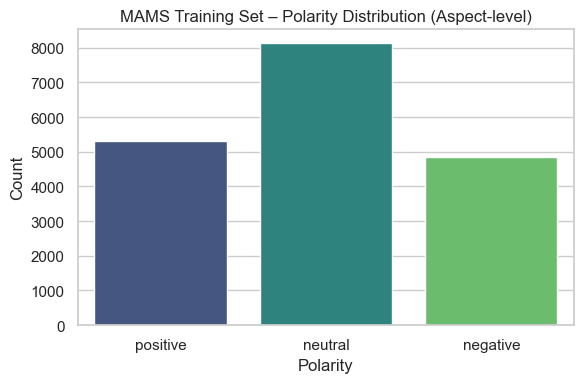

In [4]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# ------------------------------------------------
# 1. Load dataset
# ------------------------------------------------
ds = load_dataset("NEUDM/mams")
train = ds["train"].to_pandas()

# ------------------------------------------------
# 2. Extract polarities from output column
#    output = "[['food','positive'], ['service','negative']]"
# ------------------------------------------------

def extract_polarities(output_str):
    try:
        parsed = ast.literal_eval(output_str)
        if isinstance(parsed, list):
            return [p[1] for p in parsed]   # take polarity from [aspect, polarity]
    except:
        return []
    return []

train["polarity_list"] = train["output"].apply(extract_polarities)

# ------------------------------------------------
# 3. Flatten into one big list of all polarities
# ------------------------------------------------
all_polarities = []

for plist in train["polarity_list"]:
    all_polarities.extend(plist)

# Convert to DataFrame for counting
pol_df = pd.DataFrame({"polarity": all_polarities})

# ------------------------------------------------
# 4. Count and plot
# ------------------------------------------------
counts = pol_df["polarity"].value_counts()
percent = pol_df["polarity"].value_counts(normalize=True) * 100

print("=== Polarity Counts (Aspect-level) ===")
print(counts)
print("\n=== Polarity Percent (%) ===")
print(percent.round(2))

# Bar plot
plt.figure(figsize=(6,4))
sns.countplot(x=pol_df["polarity"], palette="viridis")
plt.title("MAMS Training Set – Polarity Distribution (Aspect-level)")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [5]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("NEUDM/mams")

# Print first 5 instructions from train
for i in range(5):
    print(f"--- Row {i} ---")
    print(ds["train"][i]["instruction"])
    print()

Repo card metadata block was not found. Setting CardData to empty.


--- Row 0 ---
 Task: Extracting aspect terms' aspect categories and their corresponding sentiment polarities. Input: A sentence. Output: A list of 2-tuples, where each tuple contains the extracted aspect category and their corresponding sentiment polarity. Supplement: "Null" means that there is no occurrence in the sentence. Example:  Input: "Hostess was extremely accommodating when we arrived an hour early for our reservation."  Output: [['staff', 'positive'], ['miscellaneous', 'neutral']] 

--- Row 1 ---
 Task: Extracting aspect terms' aspect categories and their corresponding sentiment polarities. Input: A sentence. Output: A list of 2-tuples, where each tuple contains the extracted aspect category and their corresponding sentiment polarity. Supplement: "Null" means that there is no occurrence in the sentence. Example:  Input: "Hostess was extremely accommodating when we arrived an hour early for our reservation."  Output: [['staff', 'positive'], ['miscellaneous', 'neutral']] 

--- 